## Explore the dataset.

In [2]:
# Useful imports
import numpy as np
from fastai.vision.all import *
import librosa 
import librosa.display as display

In [3]:
# import dataset
files = get_files('../data/raw', recurse=True, folders=None)

## Reading from .wav files and converting to spectogram
Using scipy.io to read the .wav files and convert them to spectograms.

In [4]:
# unused functions
def plot_wave_function(file):
    data, sample_rate = librosa.load(file)
    display.waveshow(data)
def to_spectogram(file, sample_rate=-1):

    if sample_rate == -1:
        data, sr = librosa.load(file)
        DATA = librosa.stft(data)
        DATA_db = librosa.amplitude_to_db(abs(DATA))
    
        plt.figure(figsize=(14, 5))
        display.specshow(DATA_db, x_axis = 'time', y_axis = 'hz')
        plt.colorbar()
        
    else:
            data, sr = librosa.load(file, sr=sample_rate)
            DATA = librosa.stft(data)

            DATA_db = librosa.amplitude_to_db(abs(DATA))

            plt.figure(figsize=(14, 5))
            display.specshow(DATA_db, sr=sample_rate, x_axis = 'time', y_axis = 'hz')
            plt.colorbar()

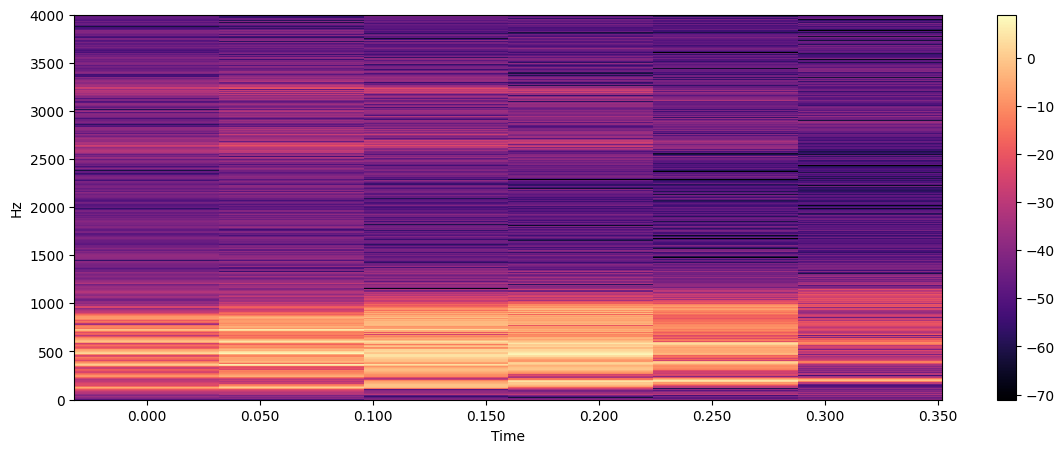

In [5]:
to_spectogram(files[4], 8000)

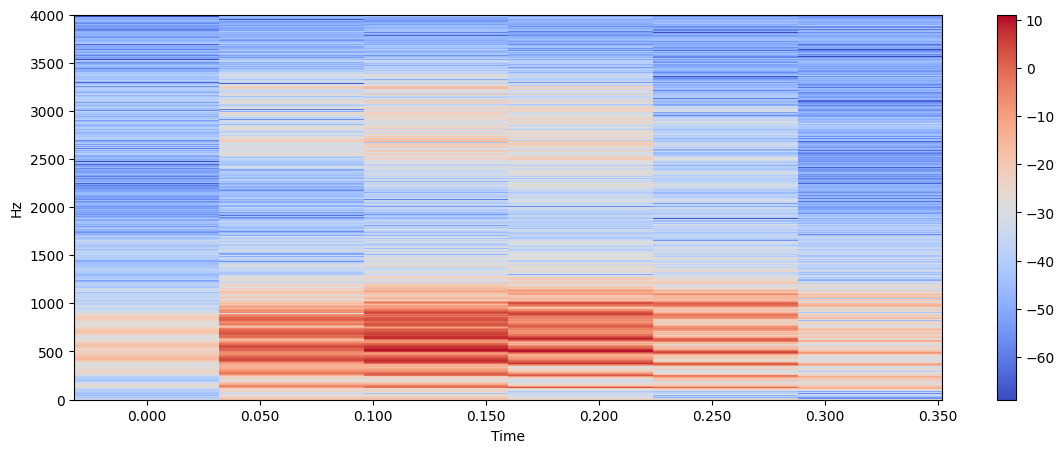

In [6]:
to_spectogram(files[6], 8000)

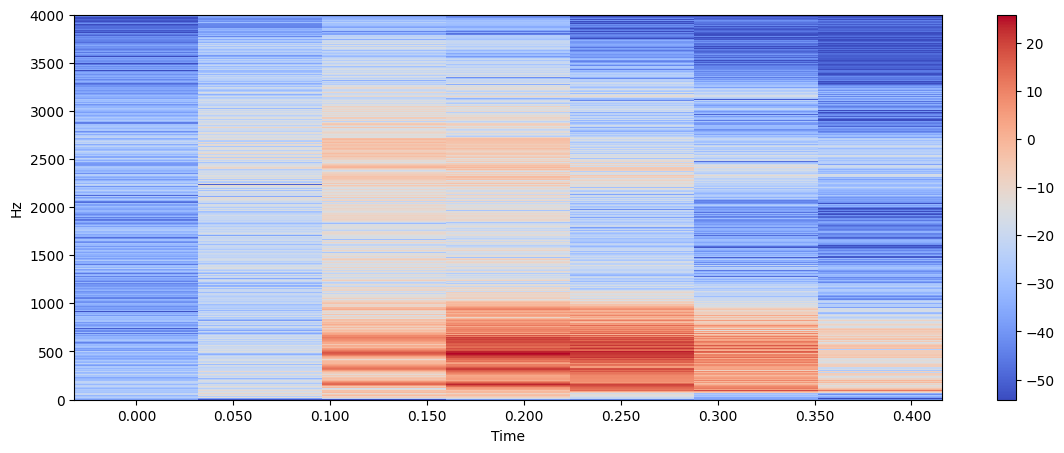

In [7]:
to_spectogram(files[96], 8000)

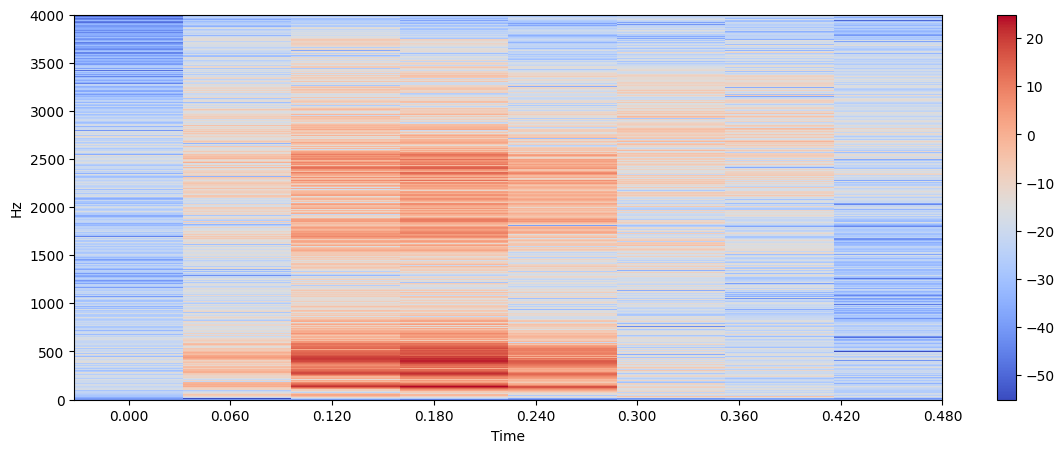

In [8]:
to_spectogram(files[11], 8000)

In [24]:
# run the following 3 cells to convert .wav files to spectograms.
import os
import wave
import pylab
plt.ion() # ion turns on display, ioff turns off

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=1, figsize=(5, 5), frameon=False)
    pylab.subplot(111)
    pylab.axis(False)
    pylab.specgram(sound_info, Fs=frame_rate)
    outdir = wav_file.replace("raw", "interim").removesuffix('.wav')
    pylab.savefig(outdir + '.png')

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate


/var/folders/lx/s13ydqvd3zz_zhxjtpp931cm0000gn/T/ipykernel_13390/1654200518.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


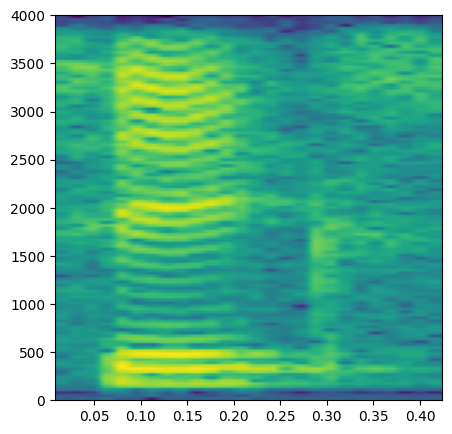

In [25]:
graph_spectrogram(f'{files[2000]}')

In [26]:
def graph_all_files(files):
    i = 0
    for file in files:
        graph_spectrogram(f'{file}')
        print(f'{i} # {file}')
        i += 1

/var/folders/lx/s13ydqvd3zz_zhxjtpp931cm0000gn/T/ipykernel_13390/1654200518.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')


0 # ../data/raw/5_nicolas_9.wav
1 # ../data/raw/3_yweweler_14.wav
2 # ../data/raw/1_lucas_5.wav
3 # ../data/raw/2_george_44.wav
4 # ../data/raw/4_yweweler_38.wav
5 # ../data/raw/3_yweweler_28.wav
6 # ../data/raw/4_yweweler_10.wav
7 # ../data/raw/3_george_1.wav
8 # ../data/raw/1_nicolas_15.wav
9 # ../data/raw/1_jackson_42.wav
10 # ../data/raw/0_theo_46.wav
11 # ../data/raw/6_lucas_9.wav
12 # ../data/raw/5_nicolas_48.wav
13 # ../data/raw/9_jackson_43.wav
14 # ../data/raw/9_nicolas_14.wav
15 # ../data/raw/4_nicolas_7.wav
16 # ../data/raw/1_nicolas_29.wav
17 # ../data/raw/4_jackson_0.wav
18 # ../data/raw/1_lucas_43.wav
19 # ../data/raw/5_jackson_23.wav
20 # ../data/raw/7_george_9.wav
21 # ../data/raw/9_nicolas_28.wav
22 # ../data/raw/5_jackson_37.wav
23 # ../data/raw/2_jackson_20.wav
24 # ../data/raw/2_jackson_34.wav
25 # ../data/raw/7_yweweler_41.wav
26 # ../data/raw/4_theo_11.wav
27 # ../data/raw/7_nicolas_2.wav
28 # ../data/raw/6_jackson_41.wav
29 # ../data/raw/6_nicolas_16.wav
30 # ../

KeyboardInterrupt: 

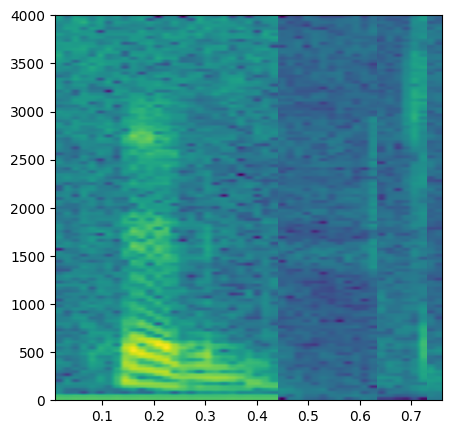

In [27]:
graph_all_files(files)